# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [142]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [6]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()
#print df_raw

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [8]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Squared differences of GRE scores are larger in magnitude that the much smaller range of GPA figures.

#### Question 4. Drop data points with missing data


In [137]:
from pandas.util.testing import assert_frame_equal

print 'Lentgh of original dataframe: ' + str(len(df_raw))
print ' '
print 'Find rows with missing data:'
df_null_index = df_raw[df_raw['gre'].isnull() | df_raw['gpa'].isnull() | df_raw['prestige'].isnull()]
print ' '
print df_null_index
print ' '
print 'Number of rows with nulls: ' + str(len(df_null_index))
print ' '
df_raw_new = df_raw.dropna()
print 'Lentgh of new dataframe: ' + str(len(df_raw_new))
print ' '




#xxx = df_raw_test.dropna()
#len(xxx)

Lentgh of original dataframe: 400
 
Find rows with missing data:
 
     admit  gre   gpa  prestige
187      0  NaN   NaN         2
212      0  NaN  2.87         2
236      1  660   NaN       NaN
 
Number of rows with nulls: 3
 
Lentgh of new dataframe: 397
 


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer:  print df_raw_new[df_raw_new['gre'].isnull() | df_raw_new['gpa'].isnull() | df_raw_new['prestige'].isnull()]

Here I use boolean 'or' to check if any of the rows in the clean d"ataframe have null values.  Below, this code shows an empty data frame based on the test.

In [138]:
print df_raw_new[df_raw_new['gre'].isnull() | df_raw_new['gpa'].isnull() | df_raw_new['prestige'].isnull()]


Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []


#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x7f3dcb16e810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3dcb178710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3dcb184a10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3dcb1843d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3dcb16ea50>,
  <matplotlib.lines.Line2D at 0x7f3dcb1780d0>]}

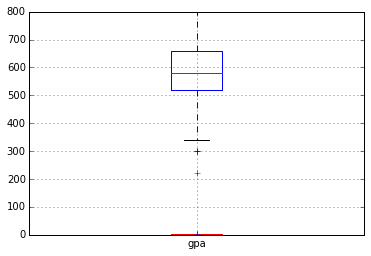

In [146]:
#boxplot 1
plt.figure();
df_raw_new.boxplot('gre')

{'boxes': [<matplotlib.lines.Line2D at 0x7f3dcb01e750>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3dcaf3eb90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3dcaf48d90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3dcaf48750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3dcaf30e50>,
  <matplotlib.lines.Line2D at 0x7f3dcaf3e550>]}

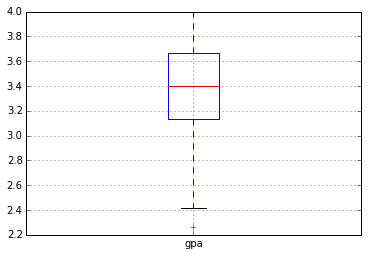

In [150]:
#boxplot 2 

df_raw_new.boxplot('gpa')

#### Question 7. What do these plots show?


Answer: They each illustrate the range of values in a column of numerical data, specifically the median, max, min, first and third quartiles.

#### Question 8. Describe each distribution 

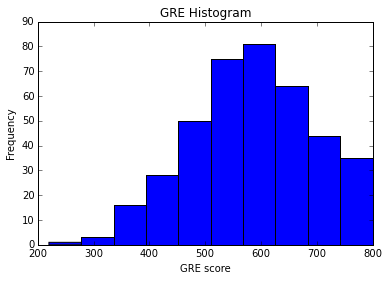

In [158]:
# plot the distribution of each variable 
#df_raw_new['gre']
plt.hist(df_raw_new['gre'])
plt.title("GRE Histogram")
plt.xlabel("GRE score")
plt.ylabel("Frequency")
plt.show()

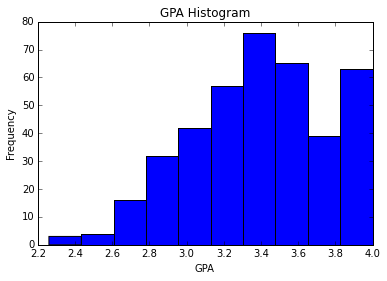

In [160]:
plt.hist(df_raw_new['gpa'])
plt.title("GPA Histogram")
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.show()

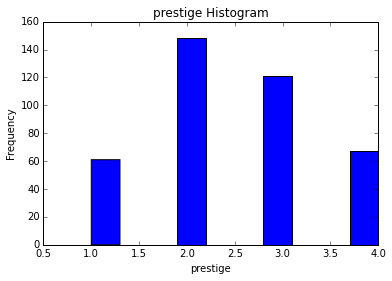

In [162]:
plt.hist(df_raw_new['prestige'])
plt.title("prestige Histogram")
plt.xlabel("prestige")
plt.ylabel("Frequency")
plt.show()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Based on the histograms above only the GRE scores come in anyway close to a symetric (normal) shaped distribution. Even the GRE right tail does not become low in terms of frequency as the left tail. The other variables do not seem to conform to a normal distribution at all.

#### Question 10.  Does this distribution need correction? If so, why? How? 
If this question refers to the frequency histograms above, it seems the last two (gpa and prestige) would require different distibutional assumptions. GPA could possibly be considered coming from a left skewed distribution of some kind. The limited set of data values for the prestige data set do not lead me to predict any particular distribution, since I can detect no characteristic shape.

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

In [207]:
# create a correlation matrix for the data
A = df_raw_new['gre']
B = df_raw_new['gpa']
C = df_raw_new['prestige']

AA = A.tolist()
BB = B.tolist()
CC = C.tolist()

columns_stacked = np.column_stack((AA,BB,CC))
#columns_stacked
corr = np.corrcoef(columns_stacked, rowvar=0)
print corr


[[ 1.          0.38240821 -0.12453252]
 [ 0.38240821  1.         -0.06097617]
 [-0.12453252 -0.06097617  1.        ]]


#### Question 12. What did you find?

Answer: The correlation matrix reveals that gre and gpa have the strongest postive correlation at about 0.38.  Correlation coeff. of -0.124 shows there is a slight negative correlation between GRE and prestige of school. GPA vs. prestive was even less negatively correlated.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1) Gather data on admissions rates and prestige
2) Diplay scatter plot with prestige as the proposed predictor variable and admissions as the the outcome variable.
3) Display a frequency histogram of the same data as in part 2 above.
4) Remove or adjust rows with missing data for analysis.
5) Consider a linear regression of outcome "admissions" vs. prestige and evaluate the results.
6) Examine the resulting model's coefficients (beta and/or intercept) using the t-test technique and 95% confidence intervals.
7) In this simple linear regression case, plot the resulting regression model line onto a scatter plot of the original data.

#### Question 14. What is your hypothesis? 

Answer: 
Prestige of undergraduate institution is not a good predictor of grad school entrance. More specifically, higher prestige ratings do no indicate higher likelihood of admission.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data